# HW1
Homework-1: Build your own CNNs from scratch and try to achieve the highest possible accuracy on the CIFAR-10 dataset. Discuss your findings.

## 查看gpu的狀況

In [1]:
!nvidia-smi

Sun Mar 19 13:53:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 導入需要的函示庫

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils,plot_model
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from keras.callbacks import EarlyStopping, TensorBoard
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator

## 使用cifar10資料集

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

## CNN model製作

In [4]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.45))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=30, batch_size=256, verbose=1)

Epoch 1/30
196/196 [==============================] - 21s 49ms/step - loss: 1.7977 - accuracy: 0.3270
Epoch 2/30
196/196 [==============================] - 9s 46ms/step - loss: 1.1905 - accuracy: 0.5707
Epoch 3/30
196/196 [==============================] - 9s 47ms/step - loss: 0.9217 - accuracy: 0.6732
Epoch 4/30
196/196 [==============================] - 9s 47ms/step - loss: 0.7714 - accuracy: 0.7284
Epoch 5/30
196/196 [==============================] - 9s 47ms/step - loss: 0.6395 - accuracy: 0.7756
Epoch 6/30
196/196 [==============================] - 9s 46ms/step - loss: 0.5308 - accuracy: 0.8146
Epoch 7/30
196/196 [==============================] - 9s 47ms/step - loss: 0.4365 - accuracy: 0.8461
Epoch 8/30
196/196 [==============================] - 9s 45ms/step - loss: 0.3575 - accuracy: 0.8748
Epoch 9/30
196/196 [==============================] - 9s 46ms/step - loss: 0.2814 - accuracy: 0.9003
Epoch 10/30
196/196 [==============================] - 9s 46ms/step - loss: 0.2241 - accur

In [5]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.2133 - accuracy: 0.8024
Test:
Loss: 1.2132914066314697
Accuracy: 0.8023999929428101


<Axes: >

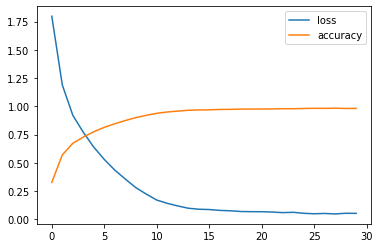

In [6]:
pd.DataFrame(history.history).plot()


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    